## Poisson calculator  
*Version 2023*  

The Poisson distribution is given by

$$f_\mu(r) = \frac{\mu^r}{r!} e^{-\mu}$$

This is the probability of $r$ events occuring in an experiment when the mean number of events  is $\mu$ - if the conditions for a Poisson distribution is satisfied. Below we provide calculators for (i) a single specific probability for a given $\mu,r$, (ii) the cumulative probability at $>r$, and (iii) the complete set of $f(r)$ values. Finally we plot $f(r)$.

As usual, do Cell/Run All first, then you can edit parameters for specific cells. First, a standard set-up.

In [6]:
from math import *  # basic maths routines
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#### (1) Single $f_\mu(r)$ values

In the code cell below, edit in the values of $\mu,r$ you want and then run the cell. Note that we have rounded down to five decimal places, but you can change that if you wish by uncommenting the extra line.

In [7]:
####### Poisson calculator
mu=0.6
r=2
# "pmf" stands for "probability mass function"
f=round(stats.poisson.pmf(r,mu),5) 
print('mu=',mu,'r=',r,  '==> f=',f)

mu= 0.6 r= 2 ==> f= 0.09879


#### (2) Cumulative $f_\mu(>r)$ values

Edit $\mu,r$ and run the cell below. 

In [8]:
### Poisson cumulative probability calculator
mu=2.0
r=4
fle=round(stats.poisson.cdf(r,mu),3) # summed prob at r and below
fge=round(stats.poisson.sf(r,mu),3) # sumed prob above r
checksum=fge+fle
print('r=',r,'  mu=',mu)
print('summed prob at r and below=',fle)
print('summed prob above r=',fge)
print('(checksum=',checksum,')')

r= 4   mu= 2.0
summed prob at r and below= 0.947
summed prob above r= 0.053
(checksum= 1.0 )


In the notes we saw how to calculate the "probability of something". A simple exercise would be to see if this gives the same answer.

#### (3) Complete set of  $f_\mu(r)$ values

Here we set $\mu$ and then calculate $f(r)$ for all $x=r$ values up to a chosen maximum value $r_{max}$. 

In [14]:
# set parameters
mu=1.8      
rmax=10           
xr=np.arange(0,rmax+1) # set up array of r values
fr=np.zeros(len(xr))  # initialise array to hold f(r) values
sampler=np.zeros(len(xr))  # initialise array to hold sampled (r) values
ntrial=25
print("mu=",mu, ' rmax=',rmax )
# make fr and print values
for i in range(0,rmax+1):
    fr[i]=round(stats.poisson.pmf(i,mu),5)
#    print('r=',i,'f(r)=',fr)
#  Do the experiment n=1000 p=mu/n times with ntrial trials
n=10000
for i in range(0,ntrial):
    count=0
    for j in range (1,n):
      if(np.random.rand()<(mu/n)): count=count+1  
    sampler[count]=sampler[count]+1
# Normalise
sampler=sampler  / ntrial
#sample mean

samplemean=np.dot(sampler,xr)
print(samplemean, "sample=", sampler)    

mu= 1.8  rmax= 10
1.4 sample= [0.24 0.36 0.2  0.16 0.04 0.   0.   0.   0.   0.   0.  ]


#### (4) Plot the distribution


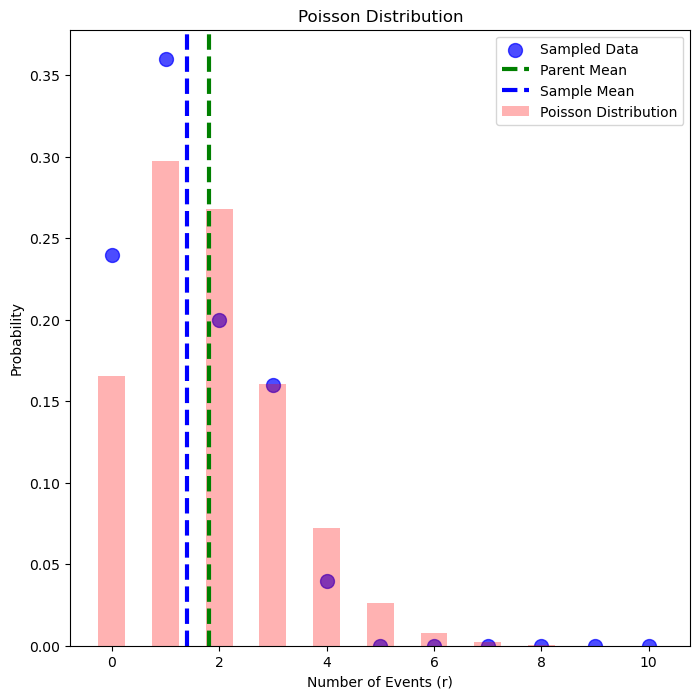

In [18]:
# Calculate standard deviation
sig = np.sqrt(mu)

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot Poisson distribution
# Plot with points for the sampled data
ax.scatter(xr, sampler, color="blue", label="Sampled Data", s=100, alpha=0.7)
# Plot with bars
ax.bar(xr, fr, width=0.5, color='red', alpha=0.3, label="Poisson Distribution")

# Set labels and title
ax.set_xlabel('Number of Events (r)')
ax.set_ylabel('Probability')
ax.set_title('Poisson Distribution')

# Draw the location of the mean
ax.axvline(mu, color='green', linestyle='--', linewidth=3, label='Parent Mean')
# Draw the location of the sample mean
ax.axvline(samplemean, color='blue', linestyle='--', linewidth=3, label='Sample Mean')

# Show legend
ax.legend()

# Show the Matplotlib plot
plt.show()
